# Numerical Solution to the Time Independent Schrödinger Equation for a 1-D Anharmonic Oscillator   

## Preamble

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy import sparse
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

Units

In [2]:
hbar=1 # Natural units, adimensional. Otherwise use hbar= 1.0545718e-34 J s

Parameters

In [31]:
omega=1 # Angular frequency in MeV
m=0.511   # mass in MeV
epsilon= -0.01  # Anharmonic parameter in MeV^4

Spatial grid

In [32]:
dx= 0.01 # Spatial step, MeV^{-1}
x=np.arange(-10,10,dx)

## Potential $V(x)=\frac{1}{2}m\omega^2 x^2+\epsilon x^3$

In [33]:
V=0.5*m*(omega**2)*x**2+epsilon*x**3
V0=diags(V) # Potential
V0.toarray()

array([[35.55      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 35.46895554,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 35.38802212, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 15.48666022,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        15.50778228,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 15.52889556]])

## Laplace operator approximated by finite differences

$\frac{\partial^2 \psi(x_n)}{\partial x^2}\approx \frac{1}{(\Delta x)^2}\left[\psi(x_{n+1})-2\psi(x_{n})+\psi(x_{n-1})\right]$

$\frac{\partial^2 \psi(x)}{\partial x^2}\approx\frac{1}{(\Delta x)^2}\begin{pmatrix}
-2 &1 & 0&\cdots& 0\\
1 & -2 & 1&\cdots& 0\\
0 & 1 &-2&\cdots& 0\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&\cdots&-2
\end{pmatrix}\begin{pmatrix}\psi(x_0)\\\psi(x_1)\\\psi(x_2)\\\vdots\\\psi(x_N) \end{pmatrix}$

In [34]:
D2=sparse.diags([1,-2,1],[-1,0,1],shape=(x.size,x.size))/dx**2 # Laplace oparator in finite differences
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

## Hamiltonian

In [35]:
H=-0.5*(hbar**2/m)*D2 + V0
H.toarray()

array([[19605.02162427, -9784.73581213,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [-9784.73581213, 19604.94057981, -9784.73581213, ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , -9784.73581213, 19604.85964639, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
        19584.95828449, -9784.73581213,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
        -9784.73581213, 19584.97940655, -9784.73581213],
       [    0.        ,     0.        ,     0.        , ...,
            0.        , -9784.73581213, 19585.00051983]])

## Diagonalization

In [36]:
energies, states = eigs(H,k=10,which='SR') ## Find 10 eigenvalues and eigenvectors sorted by the lowest eigenvalues

Lowest Eigenstates

Text(0.5, 1.0, 'Eigenstates with  mass 0.511 MeV and frequency 1 MeV')

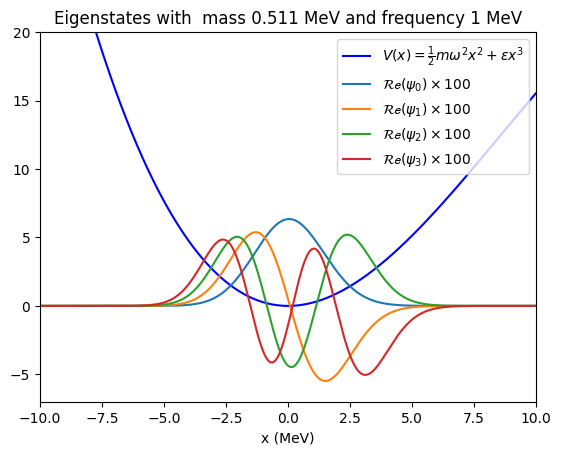

In [54]:
plt.plot(x,V,'b',label=r'$V(x)=\frac{1}{2}m\omega^2 x^2+\epsilon x^3$')
plt.plot(x,100*states[:,0].real, label=r'$\mathcal{Re}(\psi_0)\times 100$')
plt.plot(x,100*states[:,1].real, label=r'$\mathcal{Re}(\psi_1)\times 100$')
plt.plot(x,100*states[:,2].real, label=r'$\mathcal{Re}(\psi_2)\times 100$')
plt.plot(x,100*states[:,3].real, label=r'$\mathcal{Re}(\psi_3)\times 100$')
plt.legend(loc=1)
plt.xlabel('x (MeV)')
plt.xlim(-10,10)
plt.ylim(-7,20)
plt.title(f'Eigenstates with  mass {m} MeV and frequency {omega} MeV')

Energy Spectrum

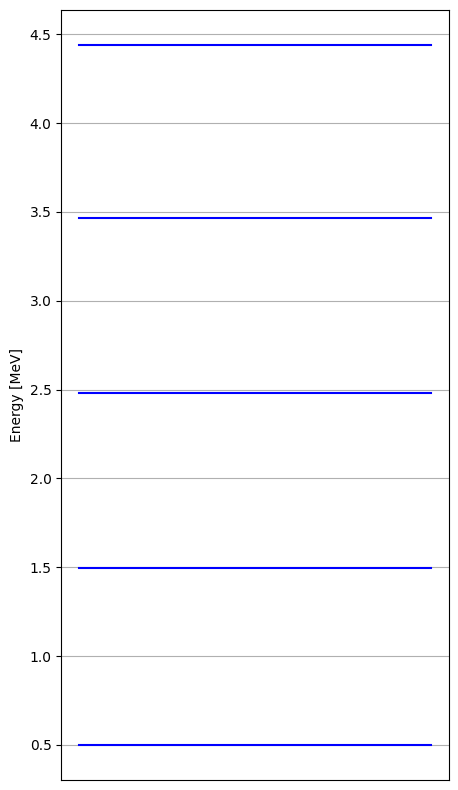

In [48]:
fig=plt.figure(figsize=(5,10))
ax=fig.gca()
levels=[[(0,1),(e.real,e.real)] for e in energies]
for level in levels[:5]:
  ax.plot(level[0],level[1],'-b')
ax.set_xticks([])
ax.set_ylabel('Energy [MeV]')
ax.grid()